Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from random import uniform
import matplotlib.pyplot as plt
from tensorflow import train
import math
from keras.callbacks import EarlyStopping
import time


In [2]:
def function(x,y):
    return math.cos(x+6*0.35*y) + 2*0.35*x*y

Creating dataset with 5000 samples to implement a (simple) neural network with TensorFlow 

In [3]:
train_inputs = np.array([[uniform(-1,1) for _ in range(2)] for _ in range(100)])
train_outputs = np.array([function(i[0],i[1]) for i in train_inputs])
test_inputs = np.array([[uniform(-1,1) for _ in range(2)] for _ in range(81)])
test_outputs = np.array([function(i[0],i[1]) for i in test_inputs])

Splitting dataset into test and training set


In [4]:
print(train_inputs.shape)
print(train_outputs.shape)
print(test_inputs.shape)
print(test_outputs.shape)

(100, 2)
(100,)
(81, 2)
(81,)


Build Model

In [5]:
model1 = keras.Sequential()
model1.add(layers.Dense(2, activation="sigmoid", input_shape=(2,)))
model1.add(layers.Dense(1, activation="sigmoid"))

model2 = keras.Sequential()
model2.add(layers.Dense(8, activation="sigmoid", input_shape=(2,)))
model2.add(layers.Dense(1, activation="sigmoid"))

model3 = keras.Sequential()
model3.add(layers.Dense(50, activation="sigmoid", input_shape=(2,)))
model3.add(layers.Dense(1, activation="sigmoid"))

model4 = keras.Sequential()
model4.add(layers.Dense(8, activation="sigmoid", input_shape=(2,)))
model4.add(layers.Dense(1, activation="sigmoid"))

earlyCallback = EarlyStopping(monitor='val_loss', min_delta=0, patience = 10, mode = 'min')
overfitCallback = EarlyStopping(monitor='loss', min_delta=0, patience = 10)

In [6]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Selecting Optimizer 

In [7]:
traingrms = keras.optimizers.RMSprop(learning_rate=0.02)

Compiling Models

In [8]:
model1.compile(optimizer=traingrms, loss='MSE')
model2.compile(optimizer=traingrms, loss='MSE')
model3.compile(optimizer=traingrms, loss='MSE')
model4.compile(optimizer=traingrms, loss='MSE')

Training Models with training dataset 

In [9]:
history1= model1.fit(train_inputs,train_outputs,epochs=1000000,validation_data=(test_inputs,test_outputs),batch_size=1,callbacks=[earlyCallback])
history2= model2.fit(train_inputs,train_outputs,epochs=1000000,validation_data=(test_inputs,test_outputs),batch_size=1,callbacks=[earlyCallback])
history3= model3.fit(train_inputs,train_outputs,epochs=1000000,validation_data=(test_inputs,test_outputs),batch_size=1,callbacks=[earlyCallback])
history4= model4.fit(train_inputs,train_outputs,epochs=1000000,validation_data=(test_inputs,test_outputs),batch_size=1,callbacks=[overfitCallback])
history5= model2.fit(test_inputs,test_outputs,epochs=1000000,batch_size=1,callbacks=[overfitCallback])

Epoch 1/1000000
100/100 [==============================] - 1s 3ms/step - loss: 0.2206 - val_loss: 0.2198
Epoch 2/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2182 - val_loss: 0.2232
Epoch 3/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2171 - val_loss: 0.2201
Epoch 4/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2162 - val_loss: 0.2174
Epoch 5/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2168 - val_loss: 0.2167
Epoch 6/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2168 - val_loss: 0.2160
Epoch 7/1000000
100/100 [==============================] - 0s 1ms/step - loss: 0.2160 - val_loss: 0.2216
Epoch 8/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2140 - val_loss: 0.2147
Epoch 9/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2142 - val_loss: 0.2126
Epoch 10/1000000
100/100 [=============================

2.

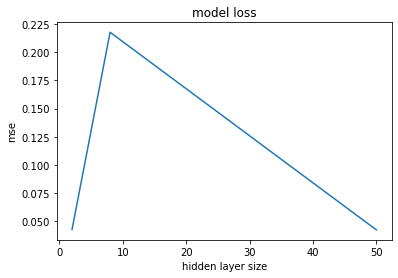

In [10]:
l1 = history1.history['loss'][len(history1.history['loss']) - 1]
l2 = history2.history['loss'][len(history2.history['loss']) - 1]
l3 = history3.history['loss'][len(history3.history['loss']) - 1]
plt.plot( [2,8,50],[l1,l2,l3])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('hidden layer size')
plt.show()

1. This graph above confirms that using a neural network with 8 hidden layer neurons is a good choice for the current problem because it has the lowest MSE at convergence.

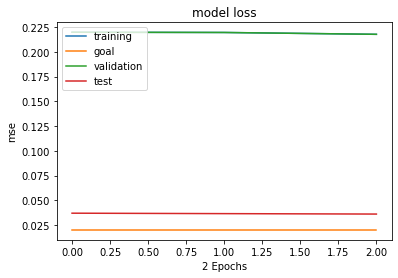

In [11]:
l1 = history2.history['loss'][len(history2.history['loss']) - 1]
l2 = history2.history['loss'][len(history2.history['loss']) - 2]
l3 = history2.history['loss'][len(history2.history['loss']) - 3]
v1 = history2.history['loss'][len(history2.history['loss']) - 1]
v2 = history2.history['loss'][len(history2.history['loss']) - 2]
v3 = history2.history['loss'][len(history2.history['loss']) - 3]
t1 = history5.history['loss'][len(history5.history['loss']) - 1]
t2 = history5.history['loss'][len(history5.history['loss']) - 2]
t3 = history5.history['loss'][len(history5.history['loss']) - 3]
plt.plot( [l3,l2,l1])
plt.plot([0.02, 0.02, 0.02])
plt.plot( [v3,v2,v1])
plt.plot( [t3,t2,t1])

plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('2 Epochs')
plt.legend(['training', 'goal', 'validation', 'test'], loc='upper left')
plt.show()

In [12]:
data = np.array([[0.01, 0.32], [0.22, 0.02]])
prediction1 = model1.predict(data)
prediction2 = model2.predict(data)
prediction3 = model3.predict(data)
prediction4 = model4.predict(data)
print(prediction1)
print(prediction2)
print(prediction3)
print(prediction4)
print(function(0.01,0.32))
print(function(0.22,0.02))

[[0.7058796]
 [0.8128869]]
[[0.81441474]
 [0.9237286 ]]
[[0.832147 ]
 [0.9350891]]
[[0.7911434]
 [0.8987122]]
0.7785535783963625
0.9689538845941909


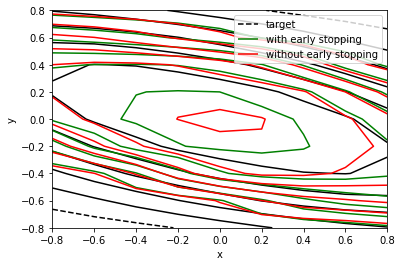

In [13]:
xs = np.arange(-0.8, 1, 0.2)
ys = np.arange(-0.8, 1, 0.2)
target = []
for y in ys:
    target.append([function(x,y) for x in xs])
p1 = []
for y in ys:
    p1.append([model2.predict([[x,y]])[0][0] for x in xs])
p2 = []
for y in ys:
    p2.append([model4.predict([[x,y]])[0][0] for x in xs])
target = np.array(target)
p1 = np.array(p1)
p2 = np.array(p2)
np.shape(target)
np.shape(p1)
np.shape(p2)
X, Y = np.meshgrid(xs, ys)
CS = plt.contour(X, Y, target, colors='k')
withStop = plt.contour(X, Y, p1, colors='g')
noStop = plt.contour(X, Y, p2, colors='r')
l1,_ = CS.legend_elements()
l2,_ = withStop.legend_elements()
l3,_ = noStop.legend_elements()
plt.legend([l1[0], l2[0], l3[0]], ['target', 'with early stopping', 'without early stopping']) 
plt.xlabel("x")
plt.ylabel("y")
plt.show()